In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import resample

In [2]:
dataset = pd.read_csv('winequality.csv')
dataset.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


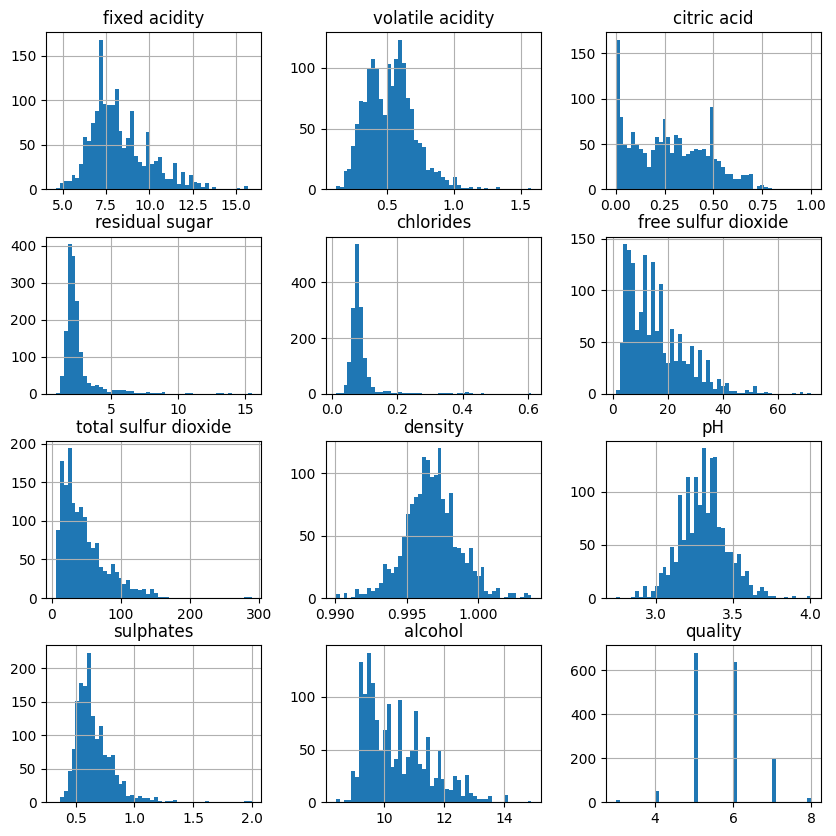

In [6]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

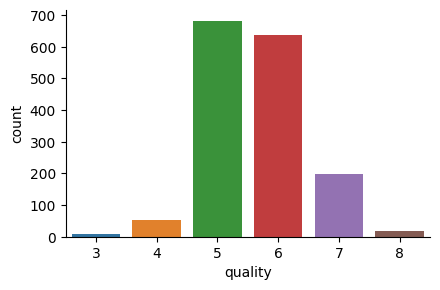

In [7]:
sns.catplot(x='quality', data = dataset, kind = 'count',height=3, aspect=1.5)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

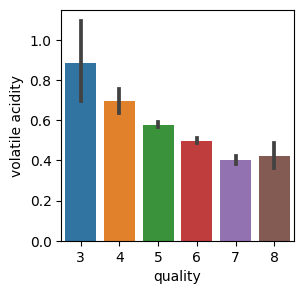

In [8]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality', y = 'volatile acidity', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

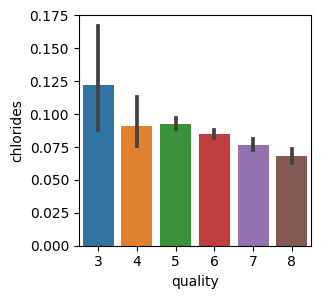

In [9]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality', y = 'chlorides', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

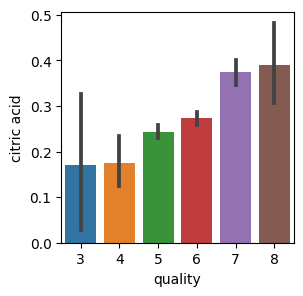

In [10]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality', y = 'citric acid', data = dataset)

<AxesSubplot:>

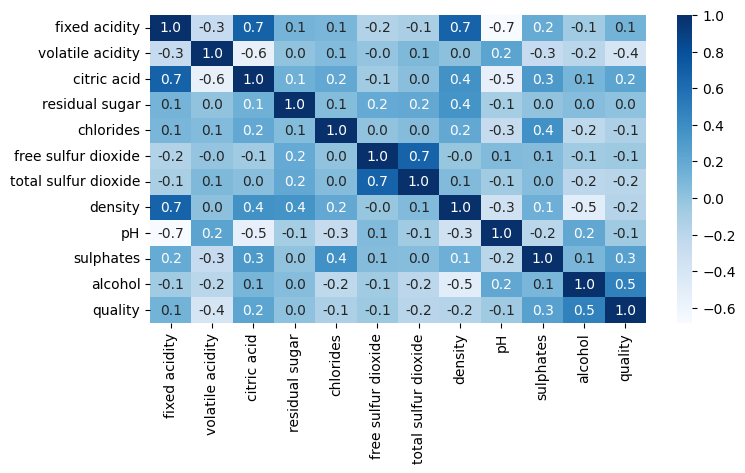

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(dataset.corr(),annot=True,fmt='0.1f',cmap = 'Blues')

In [12]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
#1 for quality as 7&8, rest are 0
dataset['quality']=[1 if x>=7 else 0 for x in dataset['quality']]

In [14]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:>

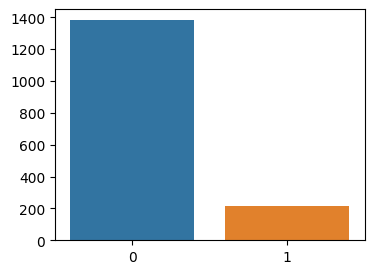

In [15]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x=dataset['quality'].value_counts().index, y = dataset['quality'].value_counts().values)

In [16]:
dataset_majority = dataset[(dataset['quality']==0)] 
dataset_minority = dataset[(dataset['quality']==1)] 
dataset_resampled = resample(dataset_minority, 
                            n_samples= 1382)  
dataset2 = pd.concat([dataset_majority, dataset_resampled])

<AxesSubplot:>

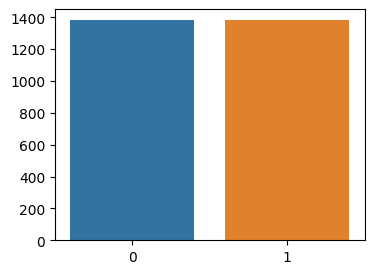

In [17]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x=dataset2['quality'].value_counts().index, y = dataset2['quality'].value_counts().values)

In [18]:
X = dataset.drop('quality',axis=1)
y = dataset['quality']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\anthe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_predlr = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predlr)*100 ,2), "%")

Accuracy Score : 86.56 %


In [22]:
print('F-1 Score : ',(f1_score(y_test, y_predlr)))
print('Precision Score : ',(precision_score(y_test, y_predlr)))
print('Recall Score : ',(recall_score(y_test, y_predlr)))

F-1 Score :  0.31746031746031744
Precision Score :  0.625
Recall Score :  0.2127659574468085


In [23]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)

SVC()

In [24]:
y_predsvm = sv.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predsvm)*100 ,2), "%")

Accuracy Score : 85.62 %


In [25]:
print('F-1 Score : ',(f1_score(y_test, y_predsvm)))
print('Precision Score : ',(precision_score(y_test, y_predsvm)))
print('Recall Score : ',(recall_score(y_test, y_predsvm)))

F-1 Score :  0.04166666666666667
Precision Score :  1.0
Recall Score :  0.02127659574468085


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_predknn = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predknn)*100 ,2), "%")

Accuracy Score : 85.62 %


In [28]:
print('F-1 Score : ',(f1_score(y_test, y_predknn)))
print('Precision Score : ',(precision_score(y_test, y_predknn)))
print('Recall Score : ',(recall_score(y_test, y_predknn)))

F-1 Score :  0.30303030303030304
Precision Score :  0.5263157894736842
Recall Score :  0.2127659574468085


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_predt = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predt)*100 ,2), "%")

Accuracy Score : 86.88 %


In [31]:
print('F-1 Score : ',(f1_score(y_test, y_predt)))
print('Precision Score : ',(precision_score(y_test, y_predt)))
print('Recall Score : ',(recall_score(y_test, y_predt)))

F-1 Score :  0.5625
Precision Score :  0.5510204081632653
Recall Score :  0.574468085106383


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_predrf = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predrf)*100 ,2), "%")

Accuracy Score : 90.62 %


In [34]:
print('F-1 Score : ',(f1_score(y_test, y_predrf)))
print('Precision Score : ',(precision_score(y_test, y_predrf)))
print('Recall Score : ',(recall_score(y_test, y_predrf)))

F-1 Score :  0.6511627906976744
Precision Score :  0.717948717948718
Recall Score :  0.5957446808510638


In [35]:
modeldata = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RFC'],
             'ACC':[accuracy_score(y_test,y_predlr)*100,
                   accuracy_score(y_test,y_predsvm)*100,
                   accuracy_score(y_test,y_predknn)*100,
                   accuracy_score(y_test,y_predt)*100,
                   accuracy_score(y_test,y_predrf)*100]})

In [36]:
modeldata

,Models,ACC
0,LR,86.5625
1,SVC,85.6250
2,KNN,85.6250
3,DT,86.8750
4,RFC,90.6250


<AxesSubplot:xlabel='Models', ylabel='ACC'>

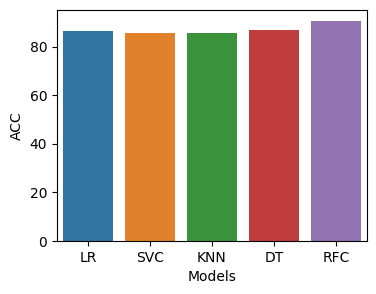

In [37]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x=modeldata['Models'],y=modeldata['ACC'])

In [38]:
from sklearn.metrics import classification_report
print("Classification report of RFC:\n")
print(classification_report(y_test,y_predrf))

Classification report of RFC:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       273
           1       0.72      0.60      0.65        47

    accuracy                           0.91       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.90      0.91      0.90       320



In [39]:
import joblib

In [40]:
joblib.dump(rfc,'wine_quality_predictions')

['wine_quality_predictions']

In [41]:
model = joblib.load('wine_quality_predictions')

In [42]:
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
     
},index=[0])

In [43]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [44]:
p = model.predict(new_data)

In [45]:
if p[0] == 1: 
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


In [ ]:
''''fixed acidity':7.5,
    'volatile acidity':0.5,
    'citric acid':0.36,
    'residual sugar':6.1,
    'chlorides':0.071,
    'free sulfur dioxide':17.0,
    'total sulfur dioxide':102.0,
    'density':0.9978,
    'pH':3.35,
    'sulphates':0.8,
    'alcohol':10.5,'''

In [ ]:
'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,

In [46]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [48]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    p11=float(e11.get())
    model = joblib.load('wine_quality_predictions')
    result=model.predict([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11]])
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction Using Machine Learning")

label = Label(master, text = "Wine Quality Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

c:\Users\anthe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
